# Projet Machine Learning : Prédiction de l'émission de CO2

In [21]:
#install.packages('MASS')

In [22]:
library(ggplot2)
library(reshape2)
library(gridExtra)
library(corrplot)
library(FactoMineR)
library(factoextra)
library(ggpubr)
library(crosstable)
library(GGally)
library(glmnet)
library(e1071)
library(rpart) 
library(randomForest)
library(DescTools)
library(forecast)
library(plotly)
library(gbm)
library(pROC)
library(ROCR)
library(MASS)
library(nnet)

In [23]:
energy = read.csv("global-data-on-sustainable-energy (1).csv")

In [24]:
head(energy)


,Entity,Year,Access.to.electricity....of.population.,Access.to.clean.fuels.for.cooking,Renewable.electricity.generating.capacity.per.capita,Financial.flows.to.developing.countries..US...,Renewable.energy.share.in.the.total.final.energy.consumption....,Electricity.from.fossil.fuels..TWh.,Electricity.from.nuclear..TWh.,Electricity.from.renewables..TWh.,⋯,Primary.energy.consumption.per.capita..kWh.person.,Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.,Value_co2_emissions_kt_by_country,Renewables....equivalent.primary.energy.,gdp_growth,gdp_per_capita,Density.n.P.Km2.,Land.Area.Km2.,Latitude,Longitude
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>
1,Afghanistan,2000,1.613591,6.2,9.22,20000,44.99,0.16,0,0.31,⋯,302.5948,1.64,760,NA,NA,NA,60,652230,33.93911,67.70995
2,Afghanistan,2001,4.074574,7.2,8.86,130000,45.60,0.09,0,0.50,⋯,236.8919,1.74,730,NA,NA,NA,60,652230,33.93911,67.70995
3,Afghanistan,2002,9.409158,8.2,8.47,3950000,37.83,0.13,0,0.56,⋯,210.8622,1.40,1030,NA,NA,179.4266,60,652230,33.93911,67.70995
4,Afghanistan,2003,14.738506,9.5,8.09,25970000,36.66,0.31,0,0.63,⋯,229.9682,1.40,1220,NA,8.832278,190.6838,60,652230,33.93911,67.70995
5,Afghanistan,2004,20.064968,10.9,7.75,NA,44.24,0.33,0,0.56,⋯,204.2312,1.20,1030,NA,1.414118,211.3821,60,652230,33.93911,67.70995
6,Afghanistan,2005,25.390894,12.2,7.51,9830000,33.88,0.34,0,0.59,⋯,252.0691,1.41,1550,NA,11.229715,242.0313,60,652230,33.93911,67.70995


## Renomination des variables pour plus de clarté dans les graphiques 

In [25]:
# Accès et modification des noms des colonnes
column_names=names(energy)
#print(column_names)
new_column_names=c("Entity", "Year","Access_elec","Access_fuels","Renewable_elec","Financial_flows","Renewable_energy","Elec_fossil","Elec_nuclear","Elec_renew","Low_carbon","Primary_energy","Energy_intensity","Value_co2","Renewables_equivalent","gdp_growth","gdp_capita","Density","Land_area","Latitude","Longitude")  # Remplacez ... par les nouveaux noms des colonnes

# Réassigner les noms des colonnes
names(energy)=new_column_names
print(names(energy))

 [1] "Entity"                "Year"                  "Access_elec"          
 [4] "Access_fuels"          "Renewable_elec"        "Financial_flows"      
 [7] "Renewable_energy"      "Elec_fossil"           "Elec_nuclear"         
[10] "Elec_renew"            "Low_carbon"            "Primary_energy"       
[13] "Energy_intensity"      "Value_co2"             "Renewables_equivalent"
[16] "gdp_growth"            "gdp_capita"            "Density"              
[19] "Land_area"             "Latitude"              "Longitude"            


# Analyse exploratoire

## Question 1 

### Nature des différentes variables

In [26]:
str(energy)

'data.frame':	3649 obs. of  21 variables:
 $ Entity               : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Year                 : int  2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 ...
 $ Access_elec          : num  1.61 4.07 9.41 14.74 20.06 ...
 $ Access_fuels         : num  6.2 7.2 8.2 9.5 10.9 ...
 $ Renewable_elec       : num  9.22 8.86 8.47 8.09 7.75 7.51 7.4 7.25 7.49 7.5 ...
 $ Financial_flows      : num  20000 130000 3950000 25970000 NA ...
 $ Renewable_energy     : num  45 45.6 37.8 36.7 44.2 ...
 $ Elec_fossil          : num  0.16 0.09 0.13 0.31 0.33 0.34 0.2 0.2 0.19 0.16 ...
 $ Elec_nuclear         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Elec_renew           : num  0.31 0.5 0.56 0.63 0.56 0.59 0.64 0.75 0.54 0.78 ...
 $ Low_carbon           : num  66 84.7 81.2 67 62.9 ...
 $ Primary_energy       : num  303 237 211 230 204 ...
 $ Energy_intensity     : num  1.64 1.74 1.4 1.4 1.2 1.41 1.5 1.53 1.94 2.25 ...
 $ Value_co2            : num  760 730 10

Nous pouvons voir ici que toutes les variables sont quantitatives à l'exception de "Entity" et "Density". Cette dernière devrait être plutôt être une variable quanitative

### Convertir Year et Entity en  variables  qualitatives

In [27]:
energy$Year = as.factor(energy$Year)
energy$Entity= as.factor(energy$Entity)

### Convertir Density en une variable numérique

In [28]:
energy$Density = as.numeric(gsub(",","",energy$Density))

In [29]:
str(energy)

'data.frame':	3649 obs. of  21 variables:
 $ Entity               : Factor w/ 176 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year                 : Factor w/ 21 levels "2000","2001",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Access_elec          : num  1.61 4.07 9.41 14.74 20.06 ...
 $ Access_fuels         : num  6.2 7.2 8.2 9.5 10.9 ...
 $ Renewable_elec       : num  9.22 8.86 8.47 8.09 7.75 7.51 7.4 7.25 7.49 7.5 ...
 $ Financial_flows      : num  20000 130000 3950000 25970000 NA ...
 $ Renewable_energy     : num  45 45.6 37.8 36.7 44.2 ...
 $ Elec_fossil          : num  0.16 0.09 0.13 0.31 0.33 0.34 0.2 0.2 0.19 0.16 ...
 $ Elec_nuclear         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Elec_renew           : num  0.31 0.5 0.56 0.63 0.56 0.59 0.64 0.75 0.54 0.78 ...
 $ Low_carbon           : num  66 84.7 81.2 67 62.9 ...
 $ Primary_energy       : num  303 237 211 230 204 ...
 $ Energy_intensity     : num  1.64 1.74 1.4 1.4 1.2 1.41 1.5 1.53 1.94 2.25 ...
 $ Value_co2            : num  760 730 

## Question 2

### Taux de valeurs manquantes

In [30]:
sum(is.na(energy))*100/(21*3649)

[1] 9.106213

### Taux de valeurs manquantes par colonne

In [31]:
#tx = colMeans(is.na(energy))*100
missing = sort(colSums(is.na(energy)),decreasing = TRUE )
tx = missing*100/(3649) 
print(missing)
print(tx)

Renewables_equivalent       Financial_flows        Renewable_elec 
                 2137                  2089                   931 
            Value_co2            gdp_growth            gdp_capita 
                  428                   317                   282 
     Energy_intensity      Renewable_energy          Access_fuels 
                  207                   194                   169 
         Elec_nuclear            Low_carbon           Elec_fossil 
                  126                    42                    21 
           Elec_renew           Access_elec               Density 
                   21                    10                     1 
            Land_area              Latitude             Longitude 
                    1                     1                     1 
               Entity                  Year        Primary_energy 
                    0                     0                     0 
Renewables_equivalent       Financial_flows        Renewable_e

### Suppression des variables corrompues

In [32]:
energy$Renewable_elec = NULL
energy$Financial_flows= NULL
energy$Renewables_equivalent = NULL

In [33]:
energy_pt2 = energy

## Question 3 

### Suppression des individus ayant des valeurs manquantes

In [ ]:
complete_energy = na.omit(energy)

In [ ]:
str(complete_energy)

Il y a bien 2868 observations.

In [ ]:
sum(is.na(complete_energy))*100/(21*3649)

On retrouve bien un taux de valeurs manquantes nul. 

## Question 5

### Hétérogénéité d'émission de CO2 de pays

In [ ]:
ggplot(complete_energy) + 
  aes(x = Year, y = Value_co2, color = Entity, group = Entity) + 
  geom_line(show.legend = FALSE) 
#complete energy avec les valeurs transformées mais on garde value_Co2
#parfoisun groupe contient une seule observation et je pense que cela ne s'affiche donc pas 

In [ ]:
paste('ecart type')
sd(complete_energy$Value_co2)
paste('moyenne :')
mean(complete_energy$Value_co2)
paste('min')
min(complete_energy$Value_co2)
paste('max')
max(complete_energy$Value_co2)

Ici nous pouvons observer que l'écart type de la variable Value CO2 est très grande, ce qui témoigne d'une hétérogéneité des valeurs par rapport à la répartition moyenne. De plus le graphique que les 5 pays ayant une emission de CO2 la plus importante sont : Chine / Etats-Unis / Inde / Japon / Allemagne

### Les pays les plus émetteurs de CO2

In [ ]:
Moy = aggregate(data=complete_energy,Value_co2~Entity,FUN=mean)
index = order(Moy$Value_co2, decreasing = TRUE )
Moy_classe = Moy[index,]
head(Moy_classe,10)
barplot(Moy[,2])

## Question 4

### Analyse descriptive unidimensionnelle

#### Variables qualitatives : Year et Entity 

In [ ]:
occ_y = table(complete_energy$Year)
print(occ_y)
barplot(occ_y, col="gold")

Chaque année n'a pas le même nombre d'observations.

In [ ]:
occ_e = table(complete_energy$Entity)
#print(occ_e)
barplot(occ_e,col = "darkorchid")


In [ ]:
occ_e20 = occ_e[occ_e<20]
barplot(occ_e20,col = "darkorchid")

Chaque pays n'a pas le même nombre d'observations. Il y en a 12 qui n'ont pas été observés durant les 20 années de l'étude

#### Pour les variables quantitatives

In [ ]:
summary(complete_energy)

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 12)
par(mfrow = c(7,2) , mar = c(4,4,2,1))

for (i in 3:length(names(complete_energy))) {
    dfi = complete_energy[,c(i)]
    hist(dfi, main=names(complete_energy)[i],xlab='Values')
}

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 10)

df = complete_energy[,-c(1,2)]
boxplot(df)

In [ ]:
boxplot(df$Value_co2)

Les échelles de valeurs sont très différentes en fonction des variables que nous regardons dans notre energyset, nos avons choisi de nous focaliser sur Value_CO2 et nous voyons que celle-ci est composée de beaucoup d'outliers. Donc l'observation en boxplot n'est pas forcément pertinente.

##### Transformation des variables

In [ ]:
complete_energy[, "SAccess_elec"] = log(complete_energy[, "Access_elec"])

g1 = ggplot(complete_energy,aes(x=Access_elec))+ geom_histogram(aes(y=..density..),binwidth = 5)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SAccess_elec))+ geom_histogram(aes(y=..density..),binwidth = 0.2)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

In [ ]:
complete_energy[, "SAccess_fuels"] = log(1+complete_energy[, "Access_fuels"])

g1 = ggplot(complete_energy,aes(x=Access_fuels))+ geom_histogram(aes(y=..density..),binwidth = 5)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SAccess_fuels))+ geom_histogram(aes(y=..density..),binwidth = 0.2)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

In [ ]:
complete_energy[, "SRenewable_energy"] = sqrt(complete_energy[, "Renewable_energy"])

g1 = ggplot(complete_energy,aes(x=Renewable_energy))+ geom_histogram(aes(y=..density..),binwidth = 5)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SRenewable_energy))+ geom_histogram(aes(y=..density..),binwidth = 0.5)+geom_density(alpha=.1, col="blue") 
grid.arrange(g1,g2,ncol=2)

In [ ]:
complete_energy[, "SElec_fossil"] = sqrt(complete_energy[, "Elec_fossil"])

g1 = ggplot(complete_energy,aes(x=Elec_fossil))+ geom_histogram(aes(y=..density..),binwidth = 25)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SElec_fossil))+ geom_histogram(aes(y=..density..),binwidth = 1)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

In [ ]:
complete_energy[, "SElec_nuclear"] = log(1+complete_energy[, "Elec_nuclear"])

g1 = ggplot(complete_energy,aes(x=Elec_nuclear))+ geom_histogram(aes(y=..density..),binwidth = 25)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SElec_nuclear))+ geom_histogram(aes(y=..density..),binwidth = 0.5)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

In [ ]:
complete_energy[, "SElec_renew"] = log(1+complete_energy[, "Elec_renew"])

g1 = ggplot(complete_energy,aes(x=Elec_renew))+ geom_histogram(aes(y=..density..),binwidth = 10)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SElec_renew))+ geom_histogram(aes(y=..density..),binwidth = 0.5)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

In [ ]:
complete_energy[, "SLow_carbon"] = sqrt(complete_energy[, "Low_carbon"])

g1 = ggplot(complete_energy,aes(x=Low_carbon))+ geom_histogram(aes(y=..density..),binwidth = 5)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SLow_carbon))+ geom_histogram(aes(y=..density..),binwidth = 0.2)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

In [ ]:
complete_energy[, "SPrimary_energy"] = log(complete_energy[, "Primary_energy"])

g1 = ggplot(complete_energy,aes(x=Primary_energy))+ geom_histogram(aes(y=..density..),binwidth = 10000)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SPrimary_energy))+ geom_histogram(aes(y=..density..),binwidth = 0.2)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

In [ ]:
complete_energy[, "SEnergy_intensity"] = log(complete_energy[, "Energy_intensity"])

g1 = ggplot(complete_energy,aes(x=Energy_intensity))+ geom_histogram(aes(y=..density..),binwidth = 1)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SEnergy_intensity))+ geom_histogram(aes(y=..density..),binwidth = 0.2)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

In [ ]:
complete_energy[, "Sgdp_capita"] = log(sqrt(complete_energy[, "gdp_capita"]))

g1 = ggplot(complete_energy,aes(x=gdp_capita))+ geom_histogram(aes(y=..density..),binwidth = 6000)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=Sgdp_capita))+ geom_histogram(aes(y=..density..),binwidth = 0.2)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

In [ ]:
complete_energy[, "SDensity"] = log(complete_energy[, "Density"])

g1 = ggplot(complete_energy,aes(x=Density))+ geom_histogram(aes(y=..density..),binwidth = 25)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SDensity))+ geom_histogram(aes(y=..density..),binwidth = 0.3)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

In [ ]:
complete_energy[, "SLand_area"] = log(complete_energy[, "Land_area"])

g1 = ggplot(complete_energy,aes(x=Land_area))+ geom_histogram(aes(y=..density..),binwidth = 200000)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SLand_area))+ geom_histogram(aes(y=..density..),binwidth = 0.3)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

In [ ]:
complete_energy[, "SValue_co2"] = log(complete_energy[, "Value_co2"])

g1 = ggplot(complete_energy,aes(x=Value_co2))+ geom_histogram(aes(y=..density..),binwidth = 100000)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SValue_co2))+ geom_histogram(aes(y=..density..),binwidth = 0.3)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

In [ ]:
# complete_energy[, "SAccess_elec"] = log(complete_energy[, "Access_elec"])

# g1 = ggplot(complete_energy,aes(x=Access_elec))+ geom_histogram(aes(y=..density..),binwidth = 5)+geom_density(alpha=.1,col="blue") 
# g2 = ggplot(complete_energy,aes(x=SAccess_elec))+ geom_histogram(aes(y=..density..),binwidth =0.3)+geom_density(alpha=.1, col="blue") 

# grid.arrange(g1,g2,ncol=2)

# #Pourquoi deux fois ? 

In [ ]:
#for (i in 3:length(names(complete_energy))) {

#complete_energy[, "SAccess.to.electricity....of.population."] = log(complete_energy[, "Access.to.electricity....of.population."])

#g1 = ggplot(complete_energy,aes(x=Access.to.electricity....of.population.))+ geom_histogram(aes(y=..density..),binwidth = 5)+geom_density(alpha=.1,col="blue") 
#g2 = ggplot(complete_energy,aes(x=SAccess.to.electricity....of.population.))+ geom_histogram(aes(y=..density..),binwidth = 0.2)+geom_density(alpha=.1, col="blue") 

#grid.arrange(g1,g2,ncol=2)
    
#}

In [ ]:
#summary(complete_energy)

In [ ]:
complete_energy = complete_energy[-c(3,4,5,6,7,8,9,10,11,14,15,16)]

In [ ]:
summary(complete_energy)

In [ ]:
boxplot(complete_energy[,-c(1,2)])

On affiche toutes les variables, mais comme elles n'ont pas la même échelle, c'est difficile à interpréter.

In [ ]:
boxplot(complete_energy[,-c(1:6,11)])

In [ ]:
boxplot(complete_energy[,c(5:6)])

In [ ]:
boxplot(complete_energy[,c(11)]) #nuclear

In [ ]:
boxplot(complete_energy[,c(4)]) #gdp growth

On ne regarde à présent que les variables transformée. L'échelle est meilleure

## Question 6 

### Analyse descriptive multidimensionnelle

#### Variable quantitative

In [ ]:
numeric_energy =complete_energy[sapply(complete_energy, is.numeric)]
mcor <- cor(numeric_energy)
par(mfrow=c(1,1), mar=c(5,5,2,2))
corrplot(mcor, order="hclust", tl.col="black")

In [ ]:
#par(mfrow = c(6,3) , mar = c(4,4,2,1))

#for (i in 3:length(names(complete_energy))) {
 #   dfi = complete_energy[,c(2,i)]
   # plot(dfi, main=names(complete_energy)[i],xlab='Values')
#}

#### Variable qualitative

Pour cette étude, nous avons essayé plusieurs techniques pour visualiser nos données. Cependant nous avons pu remarquer que le nombre d'observations par pays n'est pas identique en fonction des années (voir graphique ci-dessous), ce qui ne rend pas forcément fiable nos exploitations.En effet, nous avons également essayé d'afficher des boxplots de l'ensemble des variables en fonction de Year, mais ce n'était pas très pertinent.   

In [ ]:
quali= xtabs(~Year + Entity, data = complete_energy)
mosaicplot(quali)

## Question 8

### Dépendance entre Year et la variable à prédire

In [ ]:
Moy = aggregate( Value_co2 ~ Year, data = complete_energy, FUN = mean)

ggplot(Moy) + 
  aes(x = Year, y = Value_co2) + 
  geom_point() +
  labs(x = "Année", y = "Moyenne des émissions de CO2 (kt)", title = "Évolution moyenne des émissions de CO2 par année")

In [ ]:
Std = aggregate( Value_co2 ~ Year, data = complete_energy, FUN = sd )

Median = aggregate( Value_co2 ~ Year, data = complete_energy, FUN = median )

Stat = Moy
Stat$std = Std$Value_co2
Stat$median = Median$Value_co2

names(Stat)[which(names(Stat) == "Value_co2")] = "mean"

Stat

## Question 7

In [ ]:
str(complete_energy)

### Analyse en composante principale

In [ ]:
energy_pca = scale(complete_energy[,-c(1,2,3)], center = TRUE, scale = TRUE)
head(energy_pca)

In [ ]:
resultat_pca = PCA(energy_pca,ncp=16)
get_eig(resultat_pca)

In [ ]:
fviz_screeplot(resultat_pca, addlabels=TRUE, ylim=c(0,40))

Nous pouvons en effet voir par cette ACP, que la première composante explique 34.3% des valeurs du energy set.La deuxième composante, elle représente 18.7%. Nous pourrions réduire notre dimension à 2 car avec ces deux-ci, nous expliquons pratiquement la moitié du energy set. Il faudrait ajouter 4 dimensions pour avoir 80% des valeurs expliquées. 

In [ ]:
boxplot(resultat_pca$ind$coord)

In [ ]:
var=get_pca_var(resultat_pca)
fviz_pca_var(resultat_pca,col.var= "contrib",gradient.cols=c("grey", "red"))

In [ ]:
corrplot(resultat_pca$var$cor, is.corr=FALSE)

Dim 1 : Corrélée positivement avec Access_to_Electricity, Access_Clean_Fuel, Primary_energy_consumption, gdp_per_capita / Négativement avec Renewable_share

Dim 2 : Corrélée positivement Land_Area, Electricity_renewables

Dim 4 : Corrélée positivement Density

Dim 5 : Corrélée positivement gdp_growth

Dim 6 Corrélée positivement Latitude

# Modélisation

In [ ]:
complete_energy$SElec_fossil = NULL
complete_energy$Value_co2 = NULL

## Question 1

### Diviser échantillon d'apprentissage / de test

In [ ]:
# Moy = aggregate(data=complete_energy,SValue_co2~Entity,FUN=mean)
# index = order(Moy$SValue_co2, decreasing = TRUE )
# Moy_classe = Moy[index,]
# head(Moy_classe,10)
# barplot(Moy[,2])

In [ ]:
# data_S = subset(complete_energy, SValue_co2 >13 )
# data_S$Entity = as.factor (data_S$Entity)

Afin de réduire notre jeu de données, nous avons réduit l'étude sur des pays qui ont déjà une SValue_co2 supérieure à 13, nous travaillons donc sur les 11 pays les émetteurs, les plus impactants.

In [ ]:
# str(data_S)

In [ ]:
# data = data_S

In [ ]:
# str(data)

In [ ]:
set.seed(183) # initialisation du générateur

# Extraction des échantillons
test.ratio <- .2   # part de l'échantillon test
npop <- nrow(complete_energy) # nombre de lignes dans les données
nvar <- ncol(complete_energy) # nombre de colonnes

# taille de l'échantillon test
ntest <- ceiling(npop * test.ratio) 

# indices de l'échantillon test
testi <- sample(1:npop, ntest)
# indices de l'échantillon d'apprentissage
appri <- setdiff(1:npop, testi) 

# construction de l'échantillon d'apprentissage
datappr <-complete_energy[appri,] 
# construction de l'échantillon test
datestr <- complete_energy[testi, ] 

# vérification
str(datappr)
str(datestr)
#summary(datappr) 

Nous avons ici créé nous échantillon test et notre échantillon d'apprentissage. Nous pourrons donc tester notre modèle sur des données encore non traitées et éviter le surajustement. 

In [ ]:
gplot.res <- function(x, y, titre = "titre"){
    ggplot(data.frame(x=x, y=y),aes(x,y))+
    geom_point(col = "blue")+xlim(2, 17)+ylim(-0.8, 2)+
    ylab("Résidus")+ xlab("Valeurs prédites")+
    ggtitle(titre)+
    geom_hline(yintercept = 0,col="green")
}

## Question 2

### Modèle linéaire

#### Sans sélection de variable

###### Sur données apprentissage

In [ ]:
# estimation du modèle sans interaction
reg.lm <-lm(SValue_co2 ~ ., data = datappr)
# Extraction des résidus et des valeurs ajustées de ce modèle
res.lm <- reg.lm$residuals
fit.lm <- reg.lm$fitted.values
# MSE_rl = mean((datappr$SValue_co2 - fit.lm)^2)
# paste("MSE =", MSE_rl)

# Calculer le coefficient de détermination R² (R2 score)

SS_Residual <- sum((datappr$SValue_co2 - fit.lm)^2)
SS_Total <- sum((datappr$SValue_co2 - mean(datappr$SValue_co2))^2)
R2_rl <- 1 - (SS_Residual / SS_Total)
paste("R2 =", R2_rl)

plot(fit.lm,datappr$SValue_co2)

In [ ]:

gplot.res(fit.lm,res.lm,"ANCOVA sans sélection de variables")


In [ ]:
qqnorm(res.lm , pch = 1, frame = FALSE)
qqline(res.lm , col = "steelblue", lwd = 2)

Ici nous remarquons que le MSE dans le cas du modèle linéaire est très faible, voire null. Plus ce dernier est petit, plus la performance du modèle est bonne. Cela signifie que les prédictions sont plus proches des valeurs réelles.
Le coefficient de détermination, quant à lui, est très proche de 1. Plus il est proche de 1, meilleure est l'ajustement du modèle et l'explication de la variance des données.

In [ ]:
summary(reg.lm)
print(reg.lm)
str(datappr)

**Le test de nullité des paramètres montre que les variables gdp_growth, Electricity from nuclear et Electricity from renewables, pris individuellement, n'ont pas un effet significatif sur la quantité de CO2 émise par un pays au niveau 5%. Ces variables peuvent donc être enlevées du modèle séparément**

###### Sur données test

In [ ]:
# pred.aic=predict(reg.glm.step,newdata=datestr)
# # Erreur quadratique moyenne de prévision
# sum((pred.aic-datestr[,"SValue_co2"])^2)/nrow(datestr)
# err.aic=pred.aic-datestr[,"SValue_co2"]
# gplot.res(pred.aic,err.aic,titre="")
# plot(pred.aic,datestr$SValue_co2)

## Modèle avec interactions

In [ ]:
# estimation du modèle sans interaction
reg.lm <-aov(SValue_co2 ~ .^2, data = datappr)
# Extraction des résidus et des valeurs ajustées de ce modèle
res.lm <- reg.lm$residuals
fit.lm <- reg.lm$fitted.values
# MSE_rl = mean((datappr$SValue_co2 - fit.lm)^2)
# paste("MSE =", MSE_rl)

# Calculer le coefficient de détermination R² (R2 score)

SS_Residual <- sum((datappr$SValue_co2 - fit.lm)^2)
SS_Total <- sum((datappr$SValue_co2 - mean(datappr$SValue_co2))^2)
R2_rl <- 1 - (SS_Residual / SS_Total)
paste("R2 =", R2_rl)

plot(fit.lm,datappr$SValue_co2)

**Le modèle avec interactions entre les variables surajuste les données c'est à dire qu'il s'adapte trop bien à nos données d'entrainement. En prenant en compte toutes les interactions, nous obtenons un modèle difficile à interpreter et avec un grand nombre de variables. Nous allons donc faire une sélection de variables avec le critère BIC pénalisant les modèles complexes.
Nous avons fait le choix de ce critère car c'est celui qui pénalise le plus la dimension du modèle. Ainsi, il favorise les modèles qui expliquent efficacement les données tout en restant aussi simples que possible.** 

#### Avec sélection de variable (BIC)

Le BIC, ou critère d'information bayésien, vise à choisir le modèle le plus adéquat parmi plusieurs candidats en évaluant la balance entre l'ajustement aux données et la complexité du modèle. Il pénalise les modèles plus complexes pour éviter le sur-ajustement, tout en favorisant ceux qui expliquent efficacement les données. En résumé, le BIC permet une sélection automatique des modèles les mieux adaptés en considérant à la fois leur performance et leur complexité.

###### Données apprentissage

In [ ]:
reg.glm <- glm(SValue_co2 ~ ., data = datappr)
# Recherche du meilleur modèle au sens 
# du critère d'Akaïke par méthode descendante
reg.glm.step <- stepAIC(reg.glm, direction = "backward",k = log(nrow(datestr)), trace = 0)

In [ ]:
fit.bic=reg.glm.step$fitted
res.bic=fit.bic-datappr[,"SValue_co2"]
gplot.res(fit.bic,res.bic,titre="Ancova avec sélection de variables")

In [ ]:
plot(fit.bic,datappr$SValue_co2)

In [ ]:
#as.data.frame(reg.glm.step$coefficients) pour la question d'après

In [ ]:
anova(reg.glm.step, test = "F")

###### MSE et R2

In [ ]:
# MSE_aic = mean((datappr$SValue_co2 - fit.aic)^2)
# paste("MSE =", MSE_aic)

# Calculer le coefficient de détermination R² (R2 score)

SS_Residual <- sum((datappr$SValue_co2 - fit.bic)^2)
SS_Total <- sum((datappr$SValue_co2 - mean(datappr$SValue_co2))^2)
R2_bic <- 1 - (SS_Residual / SS_Total)
paste("R2 =", R2_bic)

###### Données tests

In [ ]:
# pred.lm=predict(reg.lm,newdata=datestr)
# # Erreur quadratique moyenne de prévision
# sum((pred.lm-datestr[,"SValue_co2"])^2)/nrow(datestr)
# err.lm=pred.lm-datestr[,"SValue_co2"]
# gplot.res(pred.lm,err.lm,titre="")
# plot(pred.lm,datestr$SValue_co2)

#### Avec sélection de variable (LASSO)

Etudions notre modèle selon le critère LASSO.


Le but du LASSO est de trouver un modèle qui minimise l'erreur de prédiction tout en contrôlant la taille des coefficients des variables explicatives. En imposant une pénalité sur la somme des valeurs absolues des coefficients, le LASSO favorise des solutions où certains coefficients sont réduits à zéro. En conséquence, il permet non seulement de prédire avec précision, mais aussi de sélectionner les variables les plus importantes pour la prédiction, ce qui réduit automatiquement la complexité du modèle en excluant les variables moins significatives.

###### Données apprentissage

In [ ]:
# Dans glmnet, le 17 correspond à l'indice de notre SvalueCo2 qu'il faut mettr en y ( variable à prédire) et pas dans x.
# Il faudra aussi enlever les factors ( entity et year )
# avec toutes les variables, créer d'abord la matrice d'expériences 
# avec 'model.matrix' (penser à retirer l'intercept du modèle)
x.mat <- model.matrix(SValue_co2 ~ .-1, data = datappr)
reg.lasso <- glmnet(y = datappr$SValue_co2, x = x.mat)
options(repr.plot.width = 12, repr.plot.height = 10)
plot(reg.lasso, xvar = "lambda", label = TRUE)
#legend("topright", legend = paste(1:ncol(x.mat), " - ", colnames(x.mat)))



head(x.mat)

##### Choix optimal de l'hyperparamètre

In [ ]:
reg.lasso.cv <- cv.glmnet(y = datappr[, 17], x = x.mat)
plot(reg.lasso.cv)

On a le choix entre lambda min et lambda 1se. Au vue du nombre de variables conséquentes que nous avons, il est pertinent d'en supprimer un max donc on prend 1se

In [ ]:
paste("CV estimate of lambda :", round(reg.lasso.cv$lambda.1se, 3))
# modèle correspondant
coef(reg.lasso.cv, s = "lambda.1se")

In [ ]:
Coef = as.data.frame(as.matrix(coef(reg.lasso.cv, s = "lambda.1se")))
Coef

In [ ]:
plot(reg.lasso, xvar = "lambda", label = TRUE,xlim=c(-6,-5),ylim=c(-1,2))
abline(v=log(reg.lasso.cv$lambda.1se),col="red")

In [ ]:
fit.lasso.1se <- predict(reg.lasso.cv, s = "lambda.1se", newx = x.mat)
res.lasso.1se <- datappr$SValue_co2 - fit.lasso.1se 

In [ ]:
plot(fit.lasso.1se,datappr$SValue_co2)

##### Graphe des résidus

In [ ]:
gplot.res(fit.lasso.1se,res.lasso.1se,"Résidus avec sélection de variables lasso")

##### MSE et R²

In [ ]:
MSE_lse = mean((datappr$SValue_co2 - fit.lasso.1se)^2)
paste("MSE =", MSE_lse)

# Calculer le coefficient de détermination R² (R2 score)

SS_Residual <- sum((datappr$SValue_co2 - fit.lasso.1se)^2)
SS_Total <- sum((datappr$SValue_co2 - mean(datappr$SValue_co2))^2)
R2_lse <- 1 - (SS_Residual / SS_Total)
paste("R2 =", R2_lse)

###### Données tests

In [ ]:
#pred.lse=predict(reg.lasso.cv,newdata=datestr)
# Erreur quadratique moyenne de prévision
#sum((pred.lse-datestr[,"SValue_co2"])^2)/nrow(datestr)
#err.lse=pred.lse-datestr[,"SValue_co2"]
#gplot.res(pred.lse,err.lse,titre="")
#plot(pred.lse,datestr$SValue_co2)

### SVM

###### Données apprentissage

In [ ]:
svm.reg0 = svm(SValue_co2 ~ ., data = datappr)
summary(svm.reg0)

#### Choix du meilleur noyau SVM

In [ ]:
param = list(kernel = c("linear", "polynomial", "radial", "sigmoid"),
            cost = c(0.4, 0.5, 0.6, 0.8, 1, 1.4, 2))

svm.reg.tune = tune(svm,SValue_co2 ~ ., data = datappr, ranges = param)

svm.reg.tune

In [ ]:
#set.seed(2021)


svm.reg = svm(SValue_co2~ ., data = datappr, cost = svm.reg.tune$best.parameters$cost, 
    kernel = svm.reg.tune$best.parameters$kernel)
summary(svm.reg)

#### Résidus

In [ ]:
fit.svmr=svm.reg$fitted
res.svmr=fit.svmr-datappr[,"SValue_co2"]
gplot.res(fit.svmr,res.svmr,titre="")

Nous visualisons bien un tube sur le grpahe des résidus, caractéristique de la méthode SVM.

In [ ]:
plot(fit.svmr,datappr$SValue_co2)

###### MSE et R2

In [ ]:
MSE_svm = mean((datappr$SValue_co2 - fit.svmr)^2)
paste("MSE =", MSE_svm)

# Calculer le coefficient de détermination R² (R2 score)

SS_Residual <- sum((datappr$SValue_co2 - fit.svmr)^2)
SS_Total <- sum((datappr$SValue_co2 - mean(datappr$SValue_co2))^2)
R2_svm <- 1 - (SS_Residual / SS_Total)
paste("R2 =", R2_svm)

###### Données tests

In [ ]:
pred.svm=predict(svm.reg,newdata=datestr)
# Erreur quadratique moyenne de prévision
sum((pred.svm-datestr[,"SValue_co2"])^2)/nrow(datestr)
err.svm=pred.svm-datestr[,"SValue_co2"]
gplot.res(pred.svm,err.svm,titre="")
plot(pred.svm,datestr$SValue_co2)

### Arbre

###### Données apprentissage

In [ ]:
tree.reg=rpart(SValue_co2~.,data=datappr,control=rpart.control(cp=0.001))

In [ ]:
library(rpart.plot)
options(repr.plot.width = 15, repr.plot.height = 10)
rpart.plot(tree.reg)

In [ ]:
xmat<-xpred.rpart(tree.reg,xval=10) 
# one row for each observation and one column for each complexity value

# Cross-validation error par valeur de CP
CVerr<-apply((xmat-datappr[,"SValue_co2"])^2,2,sum)

plotcp(tree.reg)

In [ ]:
as.numeric(attributes(which.min(CVerr))$names)
tree.reg=rpart(SValue_co2~.,data=datappr,control=rpart.control(cp=as.numeric(attributes(which.min(CVerr))$names)))
rpart.plot(tree.reg,type=5,extra=101)

In [ ]:
library(partykit)
plot(as.party(tree.reg), type="simple")

In [ ]:
fit.tree=predict(tree.reg)
res.tree=fit.tree-datappr[,"SValue_co2"]

options(repr.plot.width = 12, repr.plot.height = 10)
par(mfrow = c(1, 3))
ggplot(data.frame(residuals = res.tree, predicted = fit.tree), aes(x = predicted, y = residuals)) +
  geom_point() +
  geom_hline(yintercept = 0 ,color = "red") +
  ggtitle("Tree")

In [ ]:
plot(fit.tree,datappr$SValue_co2)

###### MSE et R2

In [ ]:
MSE_a = mean((datappr$SValue_co2 - fit.tree)^2)
paste("MSE =", MSE_a)

# Calculer le coefficient de détermination R² (R2 score)

SS_Residual <- sum((datappr$SValue_co2 - fit.tree)^2)
SS_Total <- sum((datappr$SValue_co2 - mean(datappr$SValue_co2))^2)
R2_a <- 1 - (SS_Residual / SS_Total)
paste("R2 =", R2_a)

###### Données tests

[1] 0.1189664

Warning message:
"Removed 6 rows containing missing values or values outside the scale range (`geom_point()`)."


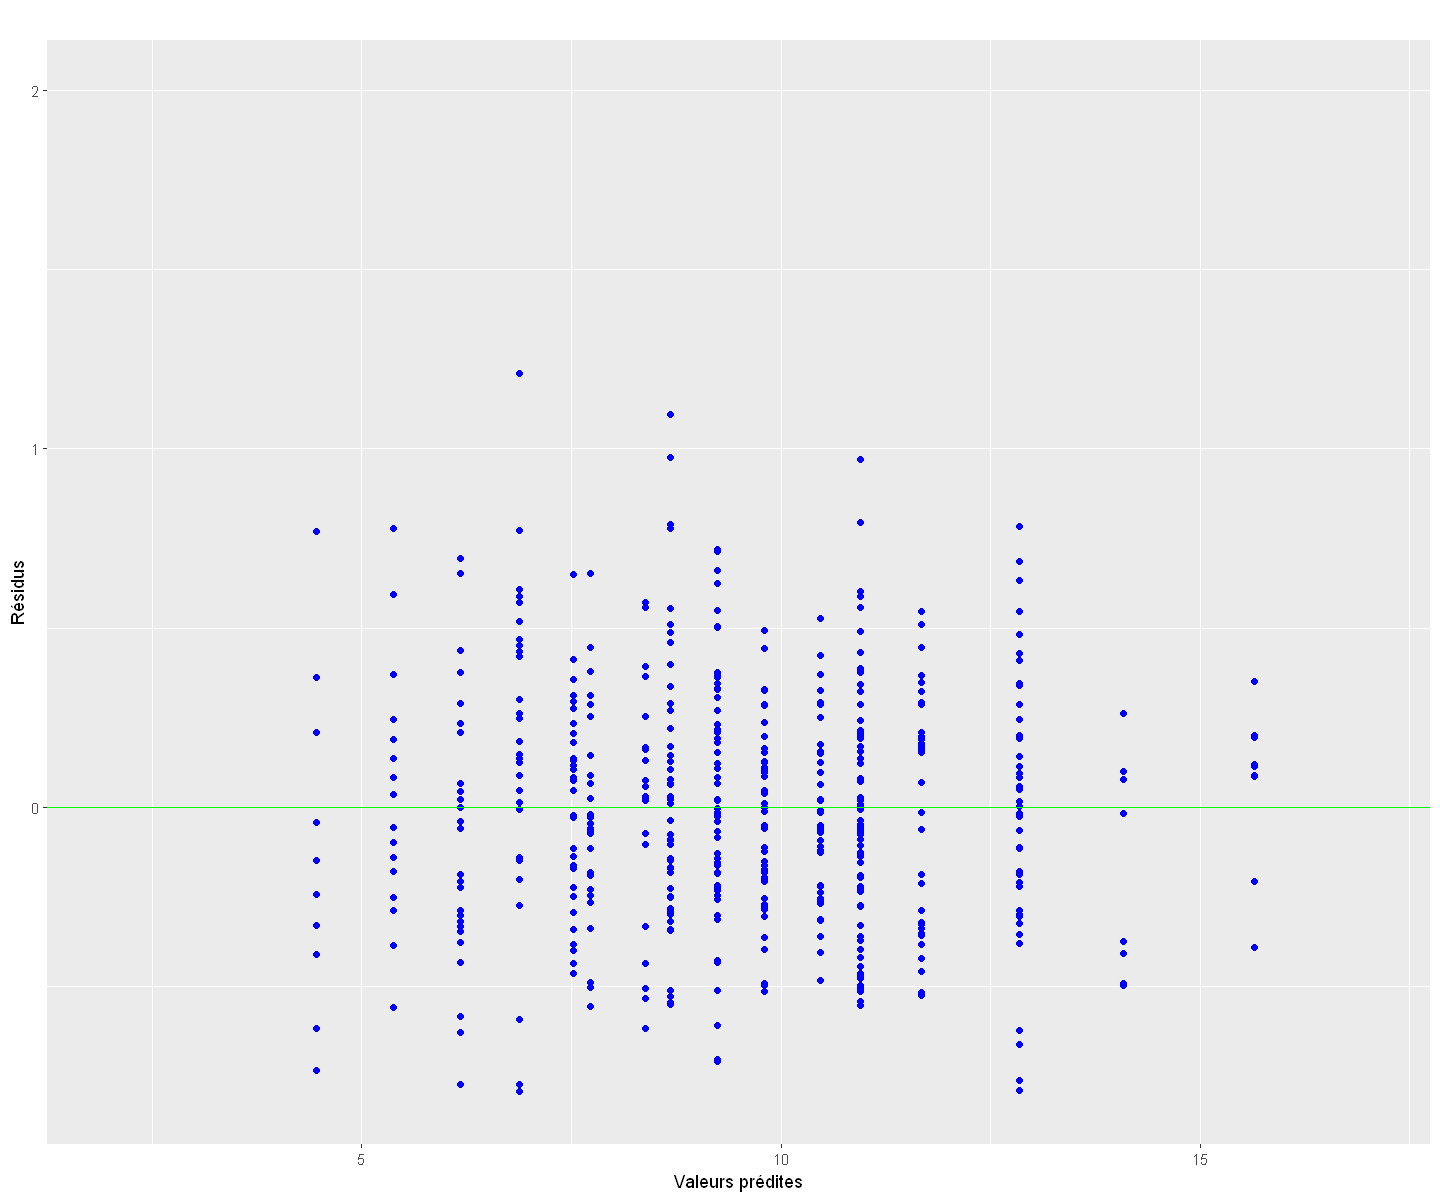

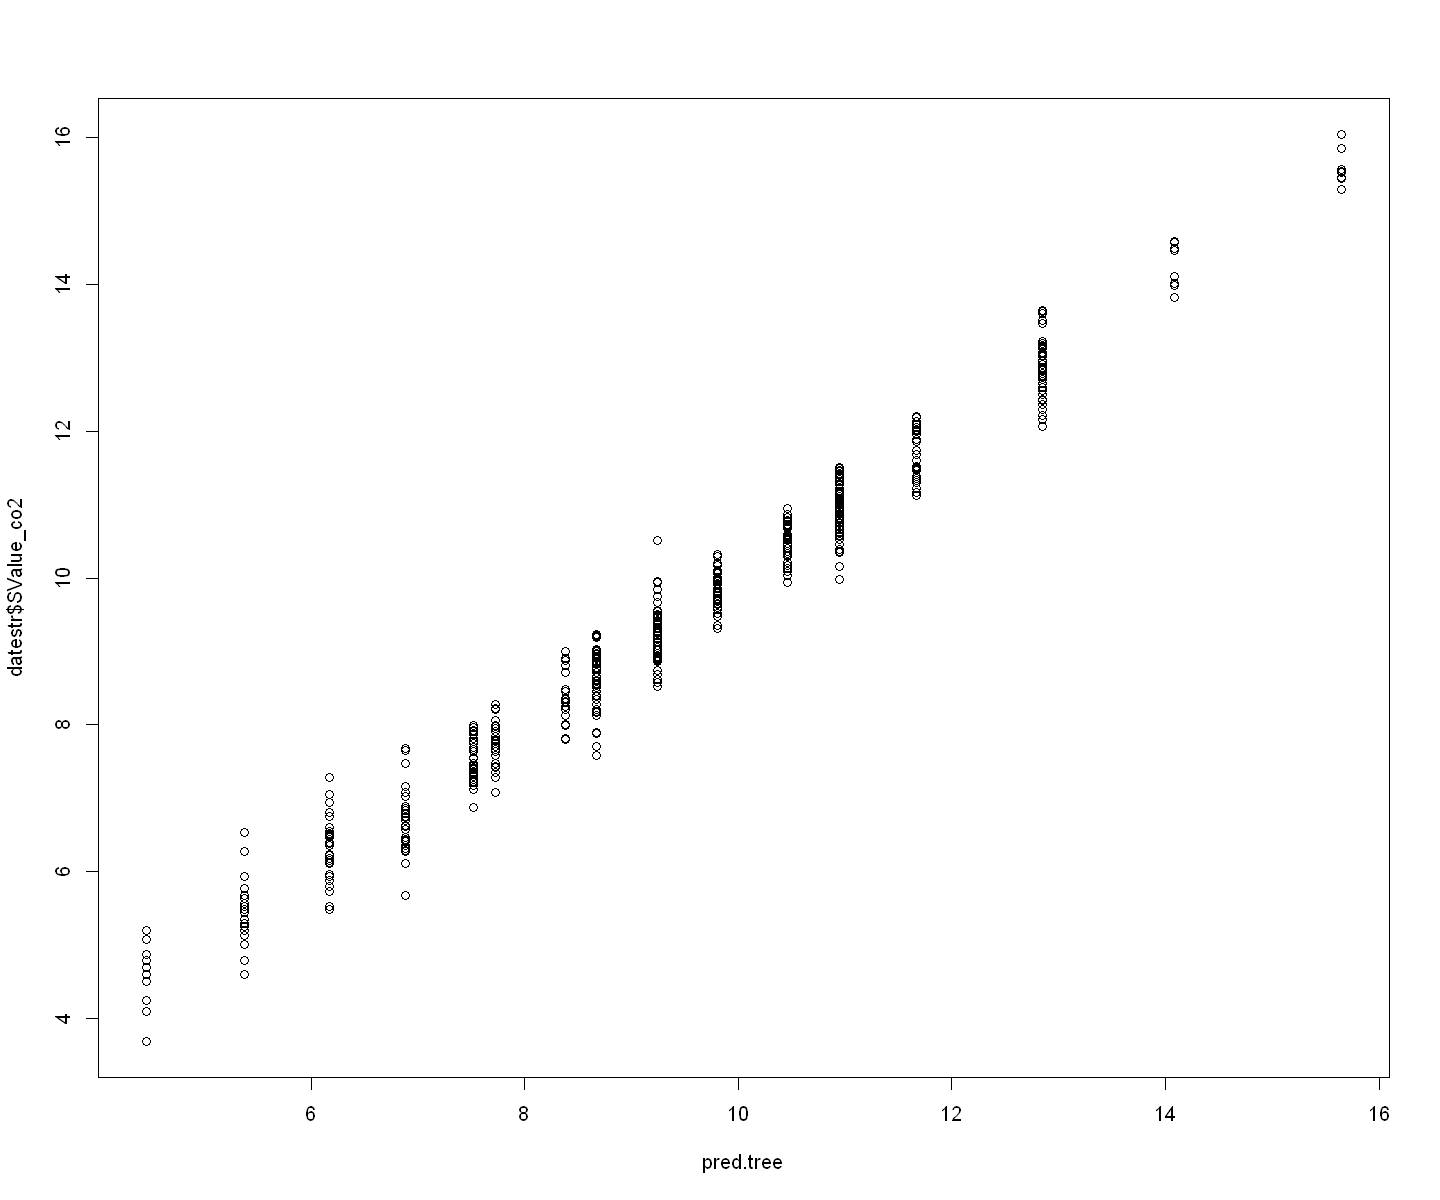

In [108]:
pred.tree=predict(tree.reg,newdata=datestr)
# Erreur quadratique moyenne de prévision
sum((pred.tree-datestr[,"SValue_co2"])^2)/nrow(datestr)
err.tree=pred.tree-datestr[,"SValue_co2"]
gplot.res(pred.tree,err.tree,titre="")
plot(pred.tree,datestr$SValue_co2)

### Random Forest

###### Données apprentissage

In [125]:
temps_debut <- Sys.time()
rf.reg=randomForest(SValue_co2~., data=datappr,xtest=datestr[,-17],ytest=datestr[,"SValue_co2"],
   ntree=500,do.trace=50,importance=TRUE)
temps_fin <- Sys.time()
temps_rf <- temps_fin - temps_debut
attributes(rf.reg)
rf.reg$mtry

ERROR: Error in randomForest.default(m, y, ...): Can not handle categorical predictors with more than 53 categories.


In [ ]:
fit.rfr=rf.reg$predicted
res.rfr=fit.rfr-datappr[,"SValue_co2"]
gplot.res(fit.rfr,res.rfr,titre="")

In [ ]:
plot(fit.rfr,datappr$SValue_co2)

###### MSE et R2

In [ ]:
MSE_rf = mean((datappr$SValue_co2 - fit.rfr)^2)
paste("MSE =", MSE_rf)

# Calculer le coefficient de détermination R² (R2 score)

SS_Residual <- sum((datappr$SValue_co2 - fit.rfr)^2)
SS_Total <- sum((datappr$SValue_co2 - mean(datappr$SValue_co2))^2)
R2_rf <- 1 - (SS_Residual / SS_Total)
paste("R2 =", R2_rf)

###### Données tests

In [ ]:
pred.rf=predict(rf.reg,newdata=datestr)
# Erreur quadratique moyenne de prévision
sum((pred.rf-datestr[,"SValue_co2"])^2)/nrow(datestr)
err.rf=pred.rf-datestr[,"SValue_co2"]
gplot.res(pred.rf,err.rf,titre="")
plot(pred.rf,datestr$SValue_co2)

### Boosting

###### Données apprentissage

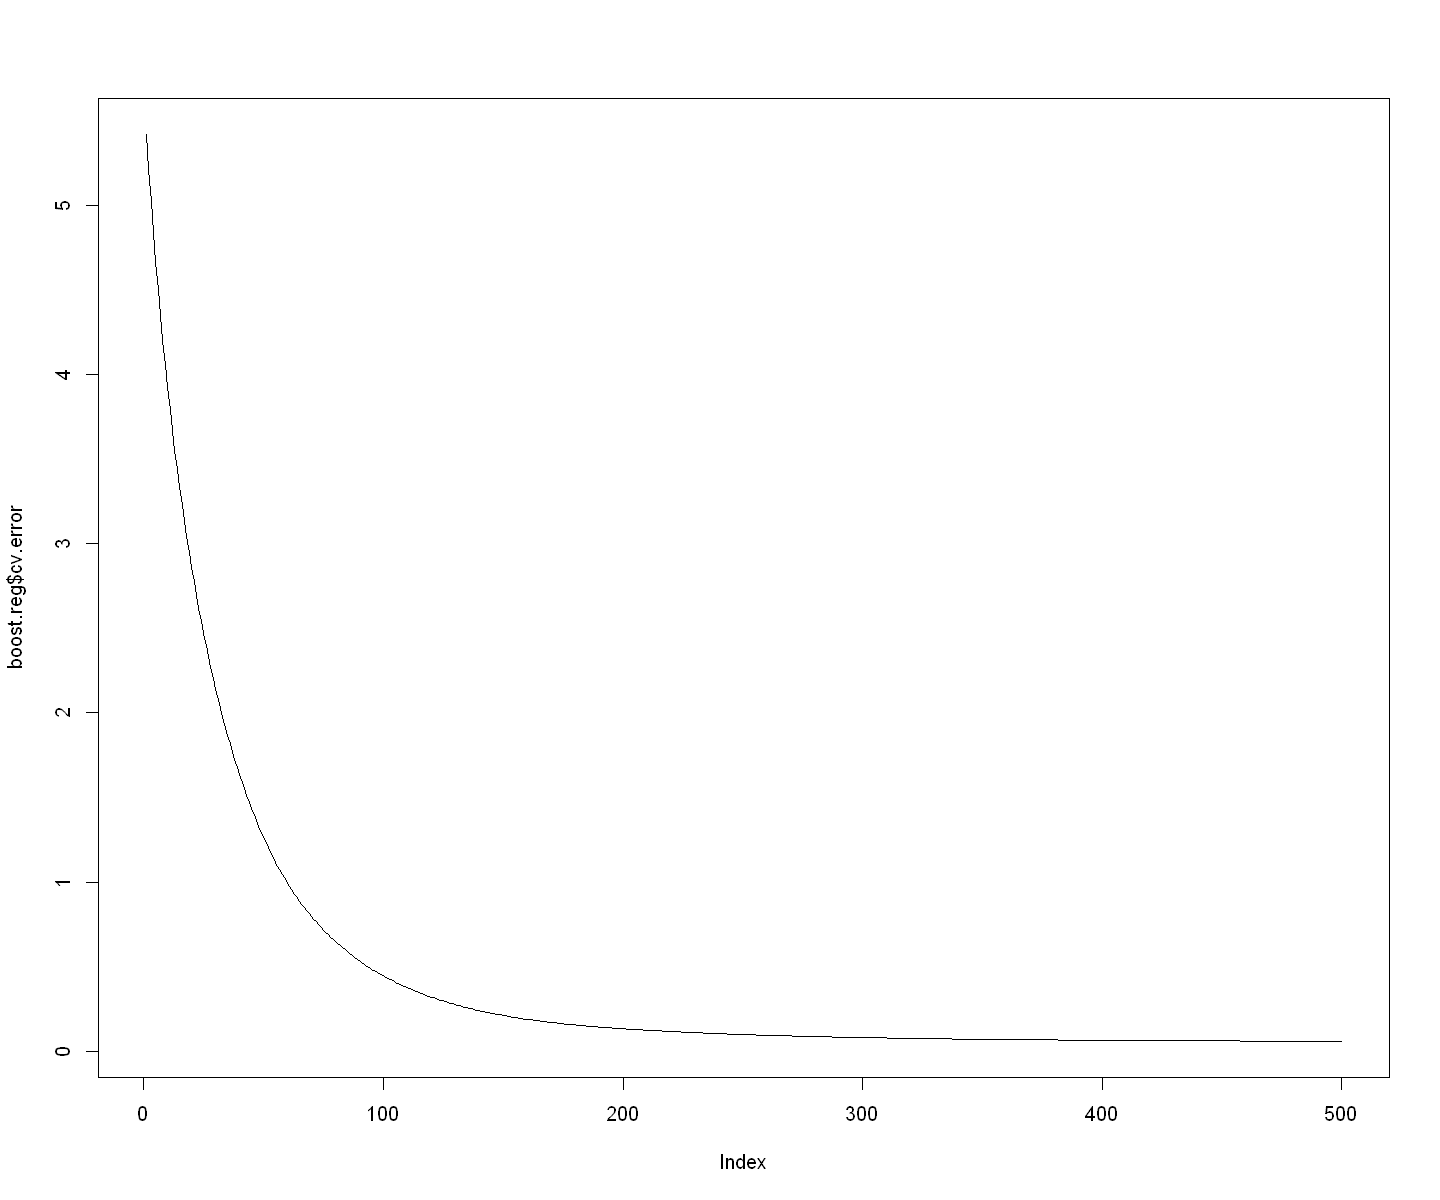

In [126]:
boost.reg = gbm(SValue_co2 ~ ., data = datappr, distribution = "gaussian", n.trees = 500, 
    cv.folds = 10, n.minobsinnode = 5, shrinkage = 0.03, verbose = FALSE)
# fixer verbose à FALSE pour éviter trop de sorties
plot(boost.reg$cv.error, type = "l")

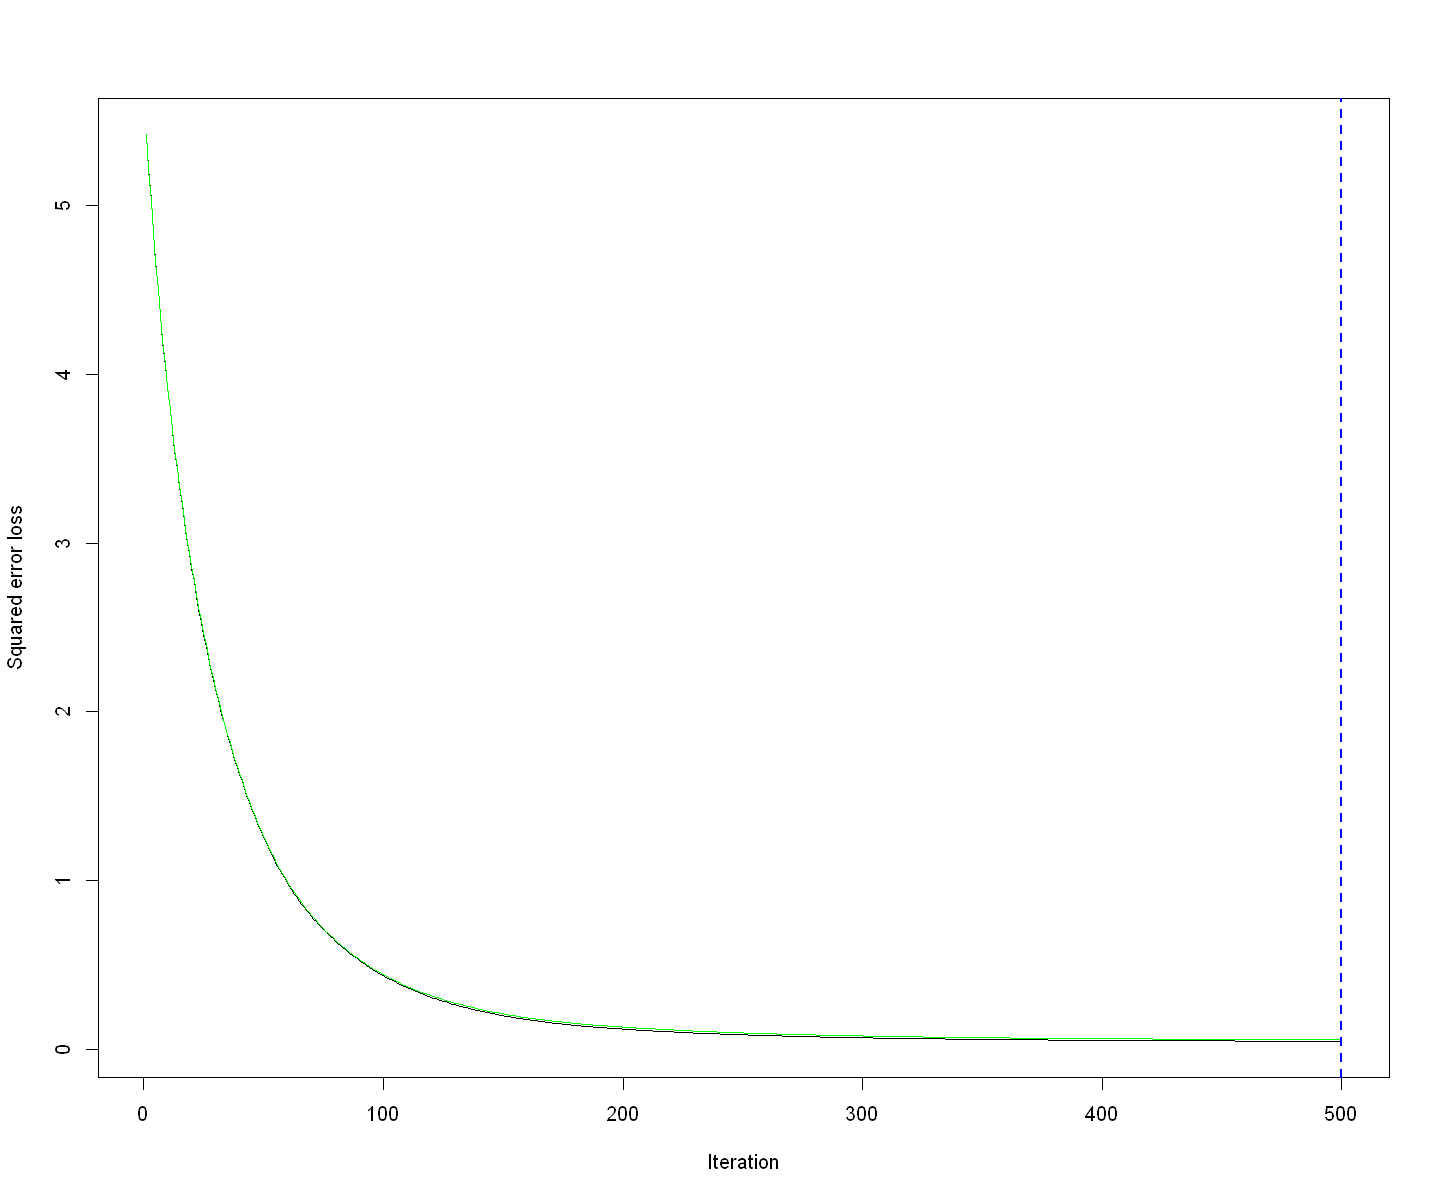

In [127]:
best.iter=gbm.perf(boost.reg,method="cv")

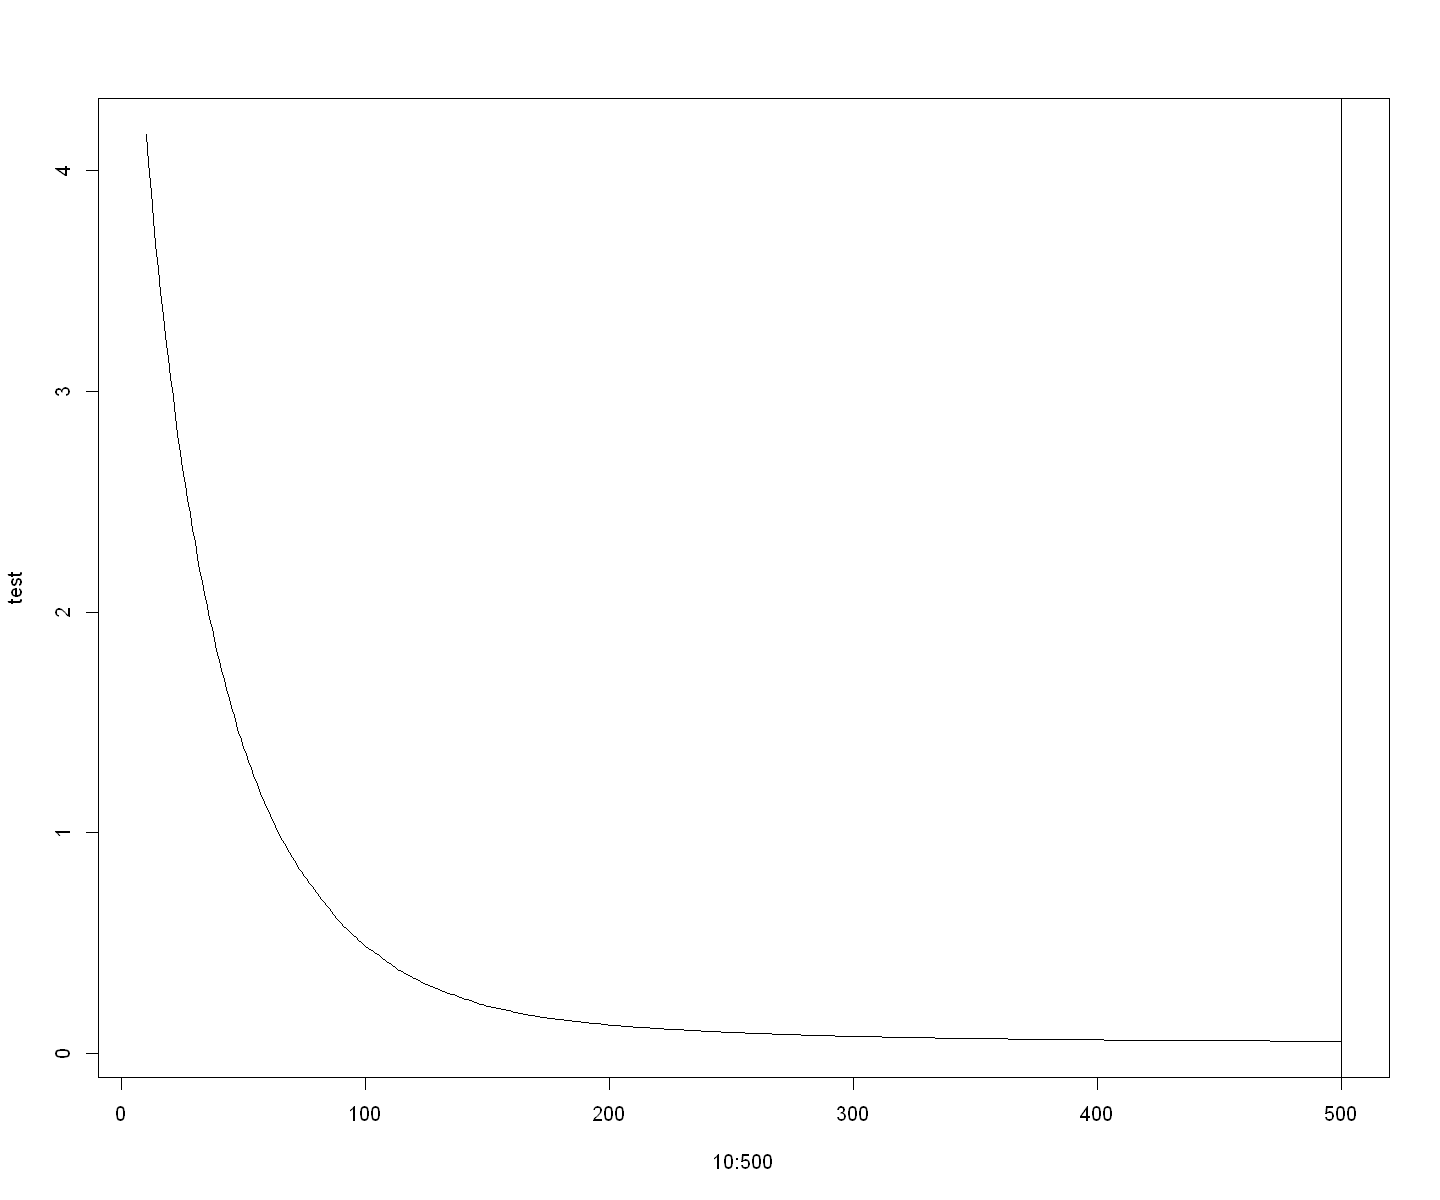

In [128]:
test=numeric()
for (i in 10:500){
pred.test=predict(boost.reg,newdata=datestr,n.trees=i)
err=sum((pred.test-datestr[,"SValue_co2"])^2)/nrow(datestr)
test=c(test,err)}
plot(10:500,test,type="l")
abline(v=best.iter)

Warning message:
"Removed 8 rows containing missing values or values outside the scale range (`geom_point()`)."


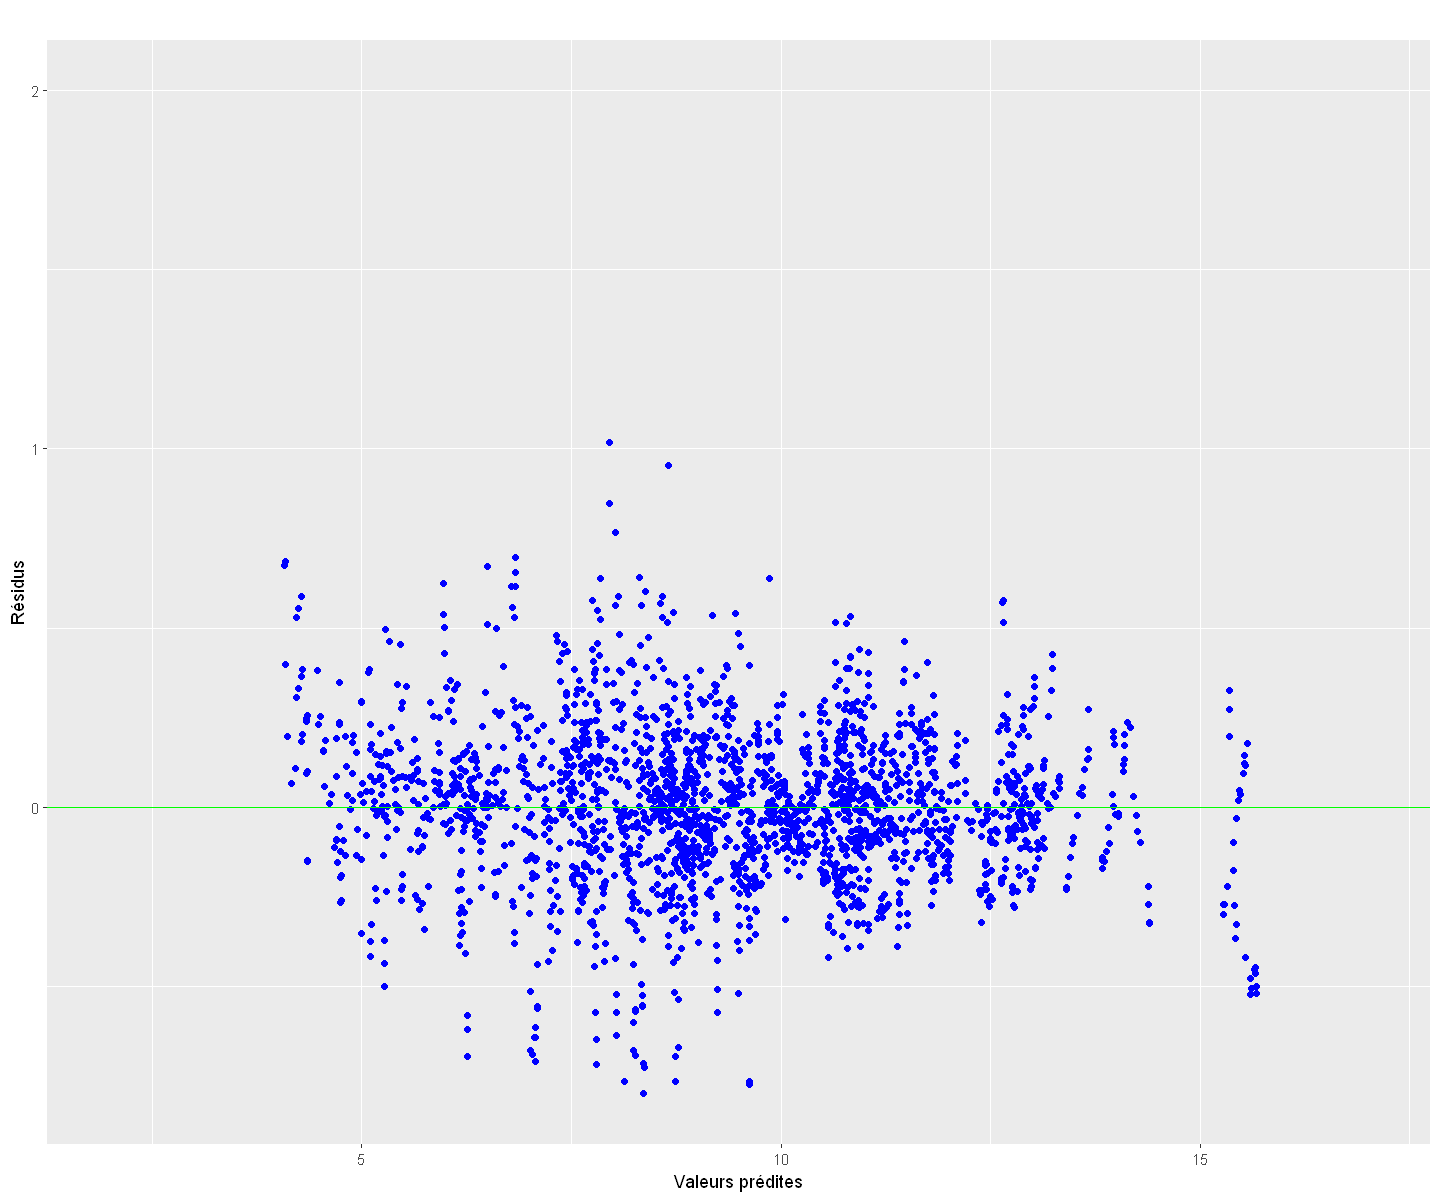

In [129]:
fit.boo=boost.reg$fit
res.boo=fit.boo-datappr[,"SValue_co2"]
gplot.res(fit.boo,res.boo,titre="")

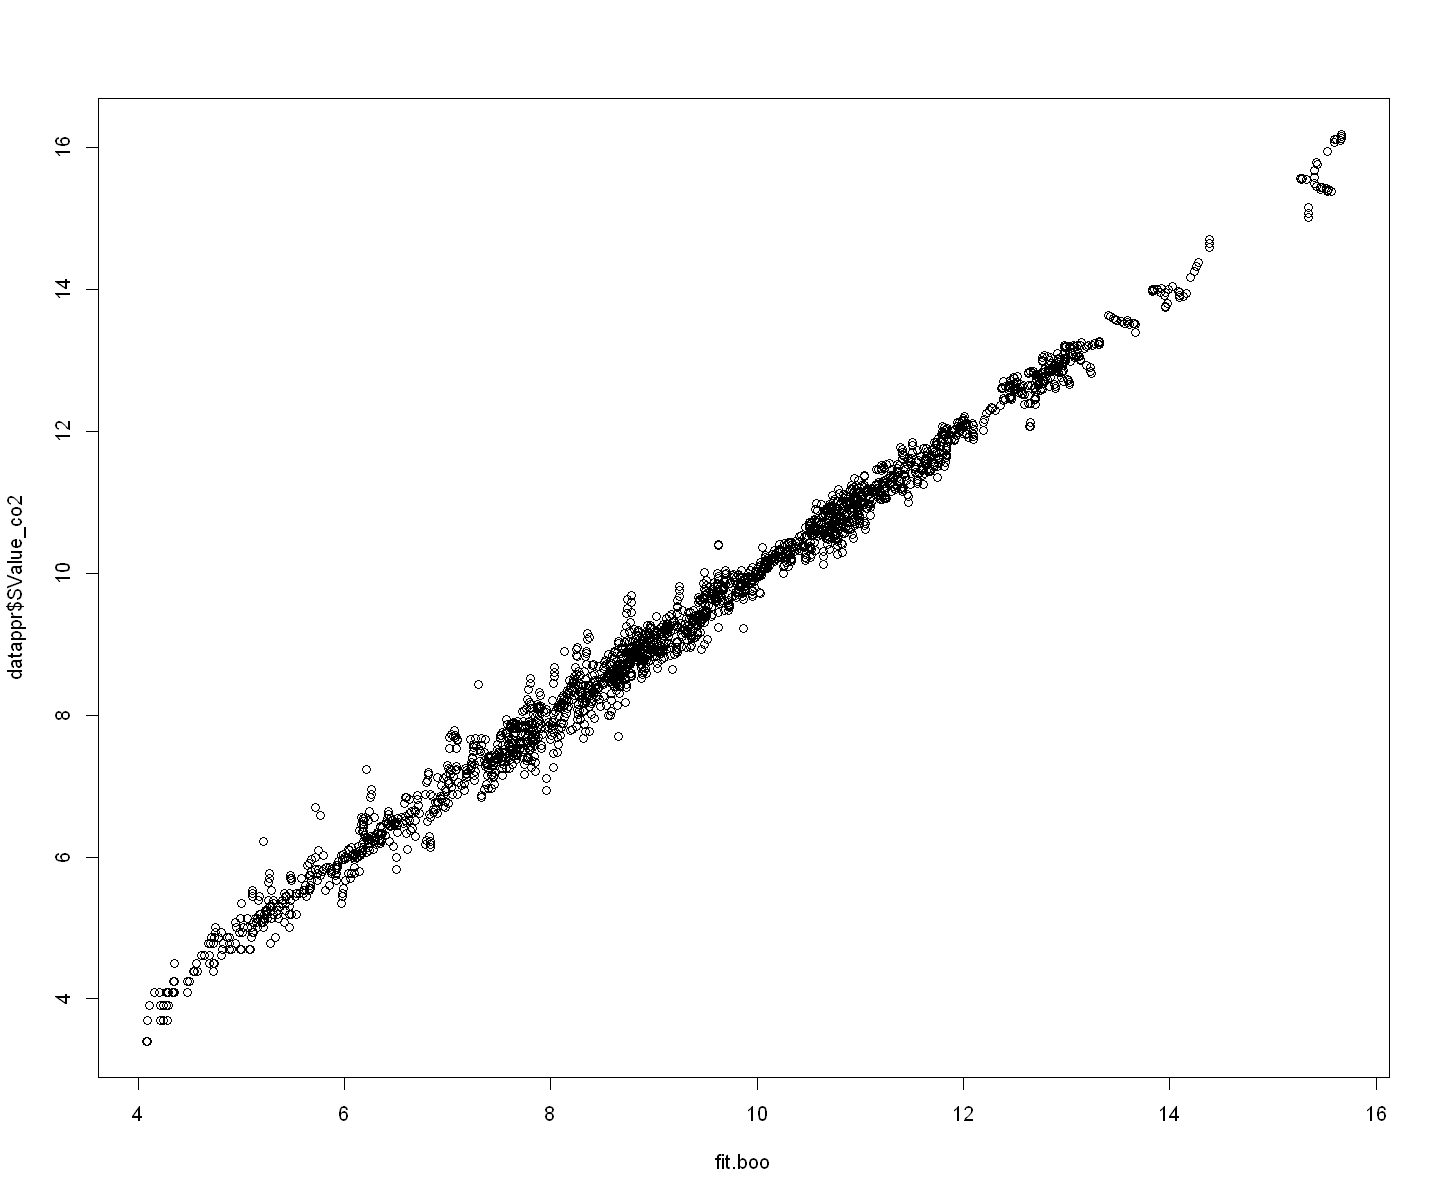

In [130]:
plot(fit.boo,datappr$SValue_co2)

###### MSE et R2

In [131]:
MSE_boo = mean((datappr$SValue_co2 - fit.boo)^2)
paste("MSE =", MSE_boo)

# Calculer le coefficient de détermination R² (R2 score)

SS_Residual <- sum((datappr$SValue_co2 - fit.boo)^2)
SS_Total <- sum((datappr$SValue_co2 - mean(datappr$SValue_co2))^2)
R2_boo <- 1 - (SS_Residual / SS_Total)
paste("R2 =", R2_boo)

[1] "MSE = 0.0486305589204481"

[1] "R2 = 0.991362070311763"

###### Données tests

Using 500 trees...




[1] 0.05506212

Warning message:
"Removed 2 rows containing missing values or values outside the scale range (`geom_point()`)."


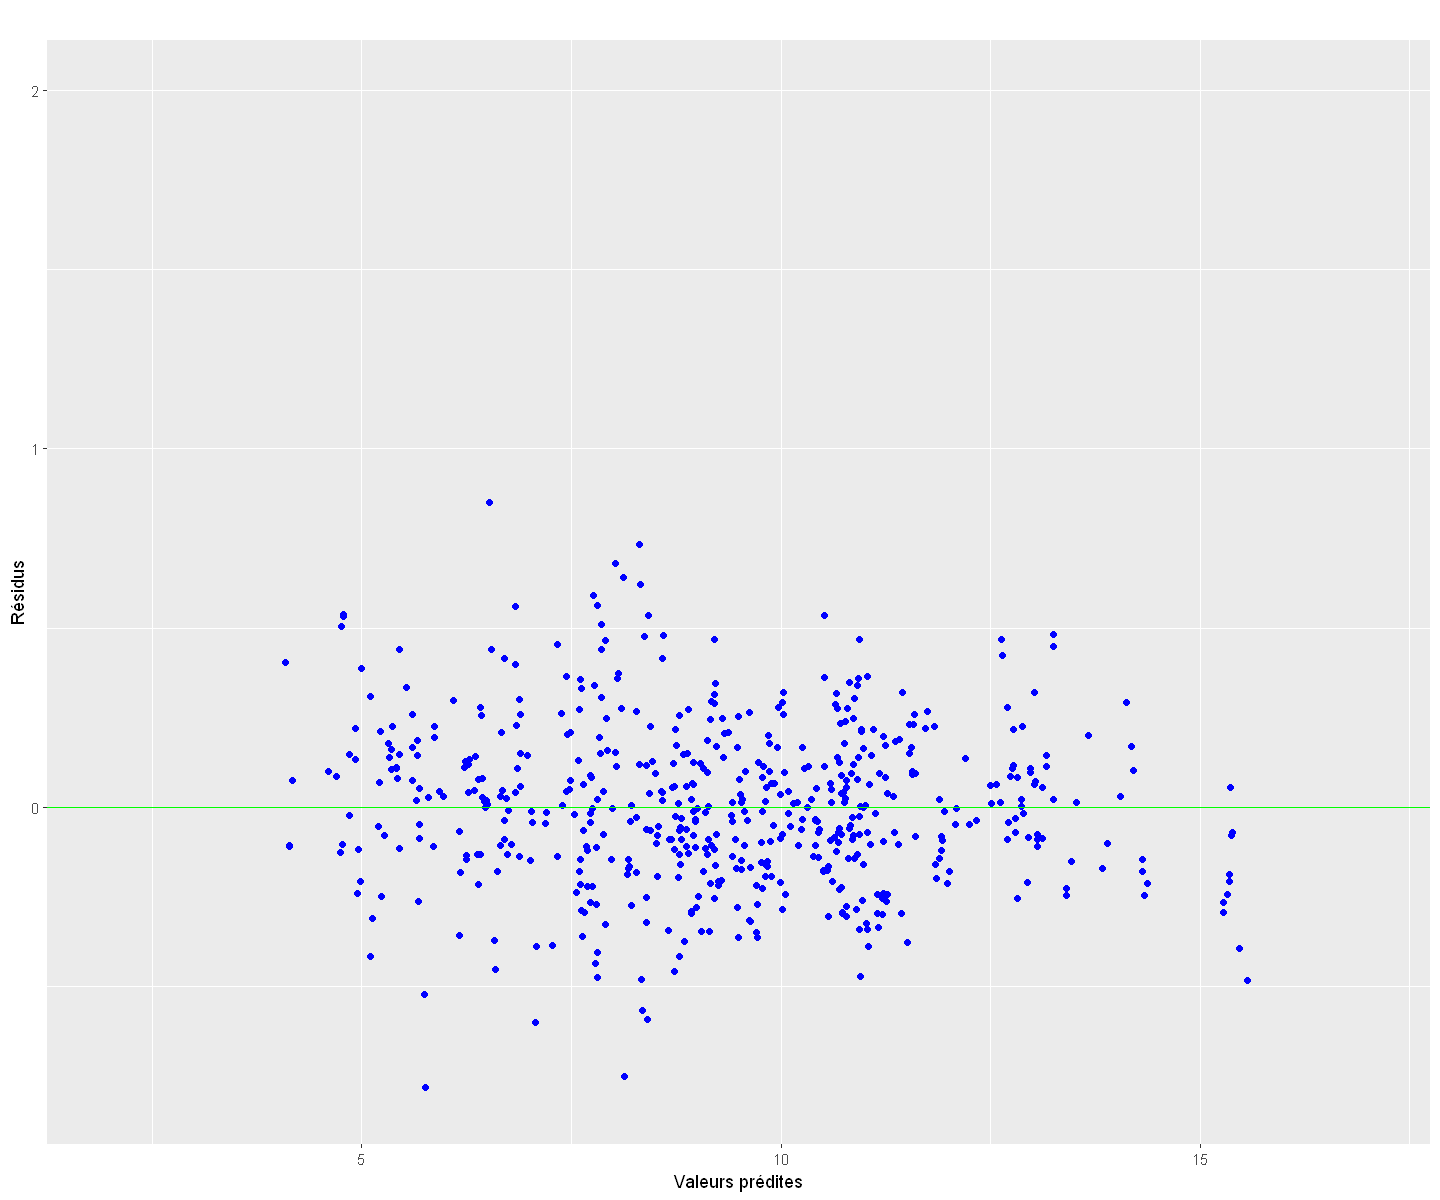

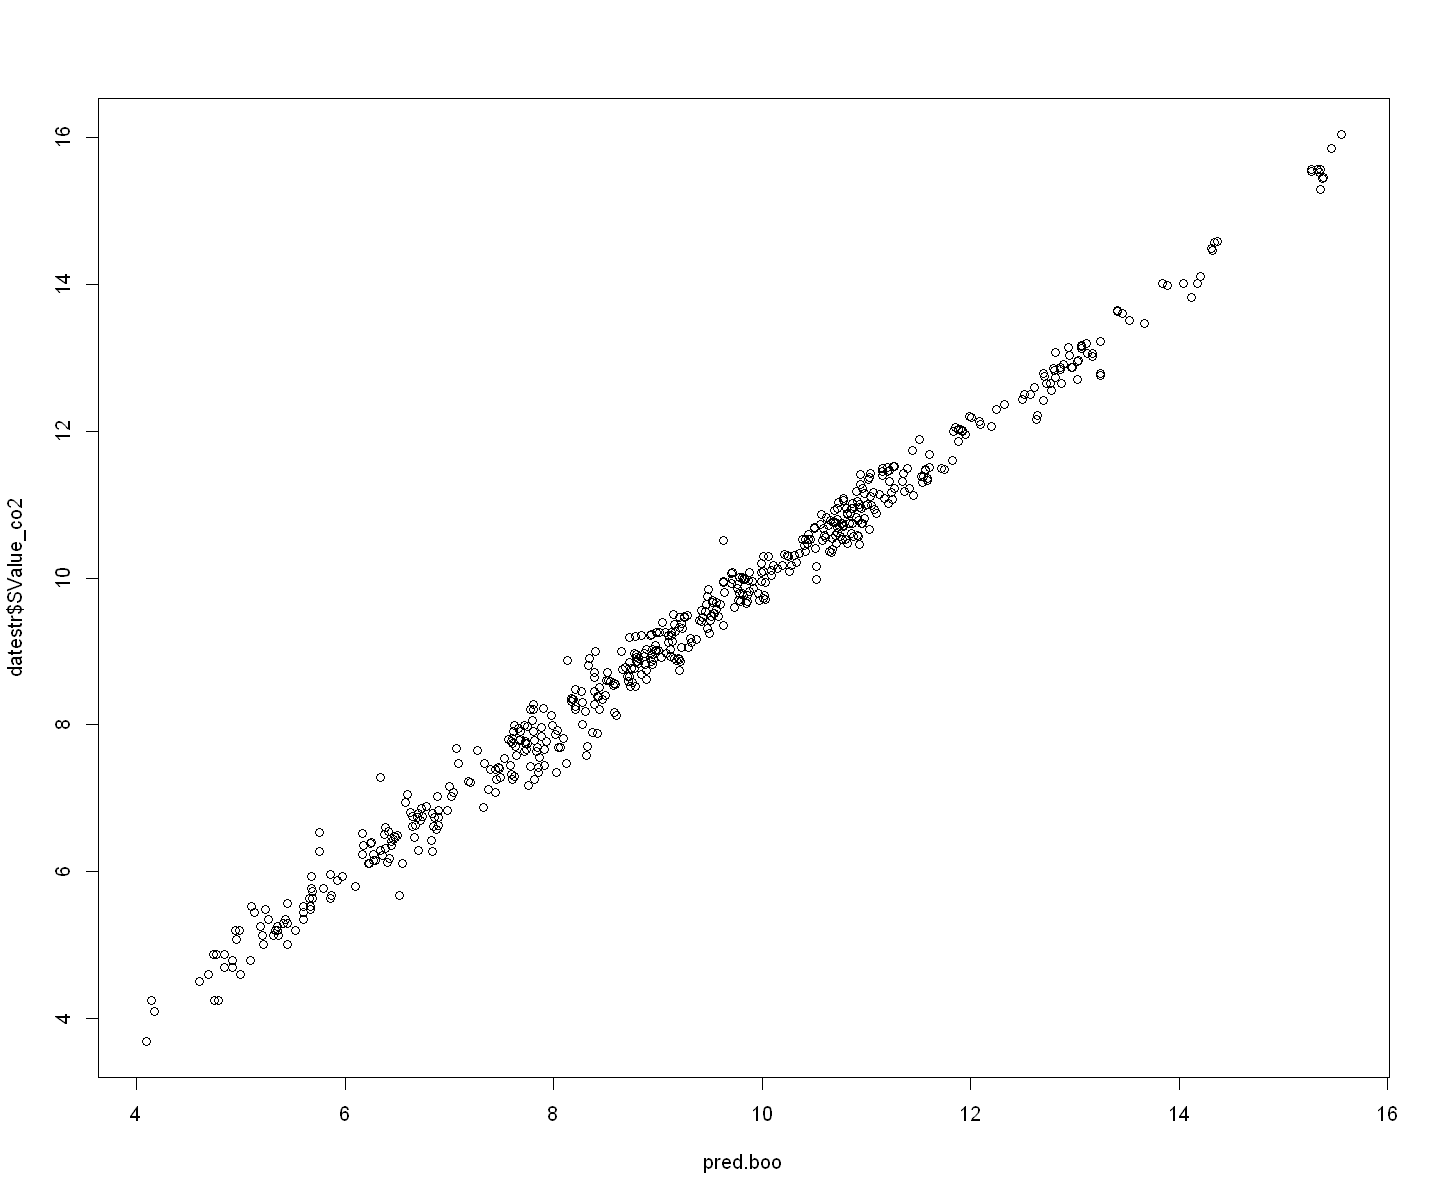

In [132]:
pred.boo=predict(boost.reg,newdata=datestr)
# Erreur quadratique moyenne de prévision
sum((pred.boo-datestr[,"SValue_co2"])^2)/nrow(datestr)
err.boo=pred.boo-datestr[,"SValue_co2"]
gplot.res(pred.boo,err.boo,titre="")
plot(pred.boo,datestr$SValue_co2)

### Neural network

#### Sur données d'apprentissage

In [133]:
nnet.reg=nnet(SValue_co2~.,data=datappr,size=5,decay=1,linout=TRUE,maxit=500) 
summary(nnet.reg)

ERROR: Error in nnet.default(x, y, w, ...): trop (1056) de pondérations


In [ ]:
plot(tune.nnet(SValue_co2~.,data=datappr,size=c(2,3,4),decay=c(1,2,3),maxit=200,linout=TRUE))

In [ ]:
nnet.reg=nnet(SValue_co2~.,data=datappr,size=3,decay=2,linout=TRUE,maxit=200)
# calcul et graphe des résidus
fit.nnetr=predict(nnet.reg,data=datappr)
res.nnetr=fit.nnetr-datappr[,"SValue_co2"]
gplot.res(fit.nnetr,res.nnetr,titre="")

In [ ]:
plot(fit.nnetr,datappr$SValue_co2)

##### MSE et R2

In [ ]:
MSE_nn = mean((datappr$SValue_co2 - fit.nnetr)^2)
paste("MSE =", MSE_nn)

# Calculer le coefficient de détermination R² (R2 score)

SS_Residual <- sum((datappr$SValue_co2 - fit.nnetr)^2)
SS_Total <- sum((datappr$SValue_co2 - mean(datappr$SValue_co2))^2)
R2_nn <- 1 - (SS_Residual / SS_Total)
paste("R2 =", R2_nn)

#### Sur données test

In [ ]:
pred.nnetr=predict(nnet.reg,newdata=datestr)
# Erreur quadratique moyenne de prévision
sum((pred.nnetr-datestr[,"SValue_co2"])^2)/nrow(datestr)
err.nnetr=pred.nnetr-datestr[,"SValue_co2"]
gplot.res(pred.nnetr,err.nnetr,titre="")
plot(pred.nnetr,datestr$SValue_co2)

## Question 3

In [ ]:
Perf <- data.frame(
  Methode = c("RegLig", "AIC", "LASSO", "SVM", "Arbre","Forêt Aléatoire","Boosting","Neural Network"),
  MSE = c(MSE_rl,MSE_aic,MSE_lse,MSE_svm,MSE_a,MSE_rf,MSE_boo,MSE_nn),
  R2 = c(R2_rl,R2_aic,R2_lse,R2_svm,R2_a,R2_rf,R2_boo,R2_nn)
)

Perf

### Retour sur l'analyse exploratoire

### Imputation des données manquantes

In [34]:
energyna = energy_pt2

In [35]:
missing = data.frame(colSums(is.na(energyna)))
missing

,colSums.is.na.energyna..
,<dbl>
Entity,0
Year,0
Access_elec,10
Access_fuels,169
Renewable_energy,194
Elec_fossil,21
Elec_nuclear,126
Elec_renew,21
Low_carbon,42


In [37]:
#On enlève Entity et Year
energynaQuant = energyna[,3:18]
#On enlève Electricity from fossil fuel
energynaQuant = energynaQuant[,-4]
energynaQuant

Access_elec,Access_fuels,Renewable_energy,Elec_nuclear,Elec_renew,Low_carbon,Primary_energy,Energy_intensity,Value_co2,gdp_growth,gdp_capita,Density,Land_area,Latitude,Longitude
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1.613591,6.20,44.99,0,0.31,65.95744,302.5948,1.64,760,NA,NA,60,652230,33.93911,67.70995
4.074574,7.20,45.60,0,0.50,84.74577,236.8919,1.74,730,NA,NA,60,652230,33.93911,67.70995
9.409158,8.20,37.83,0,0.56,81.15942,210.8622,1.40,1030,NA,179.4266,60,652230,33.93911,67.70995
14.738506,9.50,36.66,0,0.63,67.02128,229.9682,1.40,1220,8.8322778,190.6838,60,652230,33.93911,67.70995
20.064968,10.90,44.24,0,0.56,62.92135,204.2312,1.20,1030,1.4141180,211.3821,60,652230,33.93911,67.70995
25.390894,12.20,33.88,0,0.59,63.44086,252.0691,1.41,1550,11.2297148,242.0313,60,652230,33.93911,67.70995
30.718690,13.85,31.89,0,0.64,76.19048,304.4209,1.50,1760,5.3574033,263.7336,60,652230,33.93911,67.70995
36.051010,15.30,28.78,0,0.75,78.94737,354.2799,1.53,1770,13.8263195,359.6932,60,652230,33.93911,67.70995
42.400000,16.70,21.17,0,0.54,73.97260,607.8335,1.94,3560,3.9249838,364.6635,60,652230,33.93911,67.70995
